## UAS Analitika Media Sosial

NIM: **`A12.2020.06443`**

Nama: **`ISRO' RIZKY WIBOWO`**

Kelompok: **`A12.6503`**

### Load Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install library PYLDAViz

In [2]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import library

In [3]:
import pandas as pd

### A. Tokenizing with Gensim
Gensim merupakan library yang digunakan untuk topic modelling

In [4]:
df = pd.read_csv('/content/drive/My Drive/clean_dataset_PB_ROBOT.csv',sep=";")

In [5]:
df.head()

,Unnamed: 0,bintang,review,step01,tokens,step02,ProcessedText
0,0,5.0,Alhamdulillah paketnya sudah sampai dgn aman P...,alhamdulillah paketnya sudah sampai dgn aman p...,"['alhamdulillah', 'paketnya', 'sudah', 'sampai...",alhamdulillah paketnya sudah sampai dgn aman p...,alhamdulillah paket sudah sampai dgn aman prod...
1,1,5.0,"Alhamdulillah, pesanan saya sudah sampai nih k...",alhamdulillah pesanan saya sudah sampai nih ka...,"['alhamdulillah', 'pesanan', 'saya', 'sudah', ...",alhamdulillah pesanan saya sudah sampai nih ka...,alhamdulillah pesan saya sudah sampai nih ka d...
2,2,2.0,"pertama kali aku kasih bintang di bwh 4, tpi e...",pertama kali aku kasih bintang di bwh number t...,"['pertama', 'kali', 'aku', 'kasih', 'bintang',...",pertama kali aku kasih bintang di bwh number t...,pertama kali aku kasih bintang di bwh number t...
3,3,5.0,"Pengiriman sangat cepat, padahal belinya pas l...",pengiriman sangat cepat padahal belinya pas la...,"['pengiriman', 'sangat', 'cepat', 'padahal', '...",pengiriman sangat cepat padahal belinya pas la...,kirim sangat cepat padahal beli pas lagi event...
4,4,5.0,"Jika ingin menghubungi layanan PLN 123, kamu d...",jika ingin menghubungi layanan allcaps pln all...,"['jika', 'ingin', 'menghubungi', 'layanan', 'a...",jika ingin menghubungi layanan allcaps pln all...,jika ingin hubung layan allcaps pln allcaps nu...


In [6]:
df['ProcessedText'].loc[0:5]

0    alhamdulillah paket sudah sampai dgn aman prod...
1    alhamdulillah pesan saya sudah sampai nih ka d...
2    pertama kali aku kasih bintang di bwh number t...
3    kirim sangat cepat padahal beli pas lagi event...
4    jika ingin hubung layan allcaps pln allcaps nu...
5    alhamdulillah sudah sampai fungsi dengan baikk...
Name: ProcessedText, dtype: object

In [7]:
mask = [isinstance(item, (str, bytes)) for item in df['ProcessedText']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2898 non-null   int64  
 1   bintang        2898 non-null   float64
 2   review         2898 non-null   object 
 3   step01         2898 non-null   object 
 4   tokens         2898 non-null   object 
 5   step02         2898 non-null   object 
 6   ProcessedText  2898 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 158.6+ KB


In [9]:
print(df.loc[mask])

      Unnamed: 0  bintang                                             review  \
0              0      5.0  Alhamdulillah paketnya sudah sampai dgn aman P...   
1              1      5.0  Alhamdulillah, pesanan saya sudah sampai nih k...   
2              2      2.0  pertama kali aku kasih bintang di bwh 4, tpi e...   
3              3      5.0  Pengiriman sangat cepat, padahal belinya pas l...   
4              4      5.0  Jika ingin menghubungi layanan PLN 123, kamu d...   
...          ...      ...                                                ...   
2893        2997      5.0                             Biar bintang berbicara   
2894        2998      5.0                       Pengiriman cepat semoga awet   
2895        2999      5.0   produk oke banget, slim, warna nya hijau mate 👌👌   
2896        3001      4.0  Powerbank nya bagus, gak tebel2 banget, jadi g...   
2897        3002      5.0  Apakah kalian paham pengertian  Bioteknologi? ...   

                                       

In [10]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

In [11]:
word_tokens = df['ProcessedText'].values.tolist()
word_tokens

['alhamdulillah paket sudah sampai dgn aman prodak asli ori dan fungsi cakep banget dan pas beli lgi sale jadi bisa hemmat dweh mudah2an awer pb nya layan ramah packing rapih dan aman makasih kak seller',
 'alhamdulillah pesan saya sudah sampai nih ka dan sesuai pesan repeated kirim agak lama saya pesan bbrp item di bbrp lapak yg lain sudah sampai duluan ini yg akhir kemas sangat rapi kemas dg kantong plastik bubble mudah mudah awet dan tahan lama repeated',
 'pertama kali aku kasih bintang di bwh number tpi emang bener2 kesel karena barang yg kirim salah aku sen yg warna hitam yg dtg putih dan harga pun beda terus lampu ke3 cuma kedip2 dan lampu ke number ga nyala sama sekali ada garansi jg udh mls krn seller di cht cuma jawab maaf ga ngasih saran',
 'kirim sangat cepat padahal beli pas lagi event number dan packagingnya aman dapat harga promo number plus voucher cashback dari allcaps shopee allcaps barang sampai dengan aman dan fungsi dengan baik suka sekali dengan powerbank ini kare

In [12]:
data_tokens = list(sent_to_words(word_tokens))

In [13]:
data_tokens[0:3]

[['alhamdulillah',
  'paket',
  'sudah',
  'sampai',
  'dgn',
  'aman',
  'prodak',
  'asli',
  'ori',
  'dan',
  'fungsi',
  'cakep',
  'banget',
  'dan',
  'pas',
  'beli',
  'lgi',
  'sale',
  'jadi',
  'bisa',
  'hemmat',
  'dweh',
  'mudah',
  'an',
  'awer',
  'pb',
  'nya',
  'layan',
  'ramah',
  'packing',
  'rapih',
  'dan',
  'aman',
  'makasih',
  'kak',
  'seller'],
 ['alhamdulillah',
  'pesan',
  'saya',
  'sudah',
  'sampai',
  'nih',
  'ka',
  'dan',
  'sesuai',
  'pesan',
  'repeated',
  'kirim',
  'agak',
  'lama',
  'saya',
  'pesan',
  'bbrp',
  'item',
  'di',
  'bbrp',
  'lapak',
  'yg',
  'lain',
  'sudah',
  'sampai',
  'duluan',
  'ini',
  'yg',
  'akhir',
  'kemas',
  'sangat',
  'rapi',
  'kemas',
  'dg',
  'kantong',
  'plastik',
  'bubble',
  'mudah',
  'mudah',
  'awet',
  'dan',
  'tahan',
  'lama',
  'repeated'],
 ['pertama',
  'kali',
  'aku',
  'kasih',
  'bintang',
  'di',
  'bwh',
  'number',
  'tpi',
  'emang',
  'bener',
  'kesel',
  'karena',
  'b

### B. Phrase Modeling: Bigram and Trigram Models

In [14]:
len(data_tokens)

2898

In [15]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [16]:
for index in range(len(data_tokens)):
  for token in bigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)
  for token in trigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)

### C. Create Dictionary and Corpus

In [17]:
from gensim import corpora, models

# create dictionary
dictionary = corpora.Dictionary(data_tokens)

# create corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [18]:
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)]


In [19]:
len(corpus)

2898

### D. Coherence Score

In [20]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary, 
                     num_topics=i, iterations=100, random_state=2021)
    coherence_model = CoherenceModel(model=model, texts=tokens, 
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())
  
  return model_list, coherence_values

Disini kita juga mengimport model LDA karena nantinya kita akan menggunakan model tersebut

### Show graph

In [21]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus, 
                                                    data_tokens, num_topics)

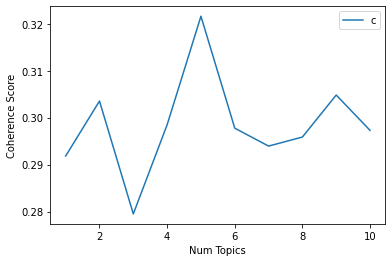

In [22]:
# Visualisasi Hasil
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [23]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)), 
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.291822
1,2,0.303542
2,3,0.279486
3,4,0.298482
4,5,0.321613
5,6,0.297763
6,7,0.293942
7,8,0.295869
8,9,0.304819
9,10,0.297294


In [24]:
coherence_df.to_csv('/content/drive/My Drive/coherence-value-final.csv', index=False)

### E. Base Model

Disini kita membuat model LDA nya terlebih dahulu

In [25]:
# build LDA Model
model = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary)

In [26]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.035*"elongated" + 0.031*"repeated" + 0.026*"baik" + 0.025*"bagus" + 0.022*"kirim" + 0.022*"cepat" + 0.020*"barang" + 0.017*"produk" + 0.015*"dengan" + 0.014*"dan"

Topic 2:
Word: 0.029*"barang" + 0.027*"awet" + 0.027*"moga" + 0.026*"repeated" + 0.024*"bagus" + 0.024*"elongated" + 0.021*"dan" + 0.020*"kirim" + 0.014*"nya" + 0.013*"produk"



In [27]:
from gensim.test.utils import datapath

temp_file = datapath("/content/drive/My Drive/ldamodel")
model.save(temp_file)

In [28]:
temp_file = datapath("/content/drive/My Drive/ldamodel")
mymodel = LdaModel.load(temp_file)
mymodel.show_topics(num_topics=2)

[(0,
  '0.035*"elongated" + 0.031*"repeated" + 0.026*"baik" + 0.025*"bagus" + 0.022*"kirim" + 0.022*"cepat" + 0.020*"barang" + 0.017*"produk" + 0.015*"dengan" + 0.014*"dan"'),
 (1,
  '0.029*"barang" + 0.027*"awet" + 0.027*"moga" + 0.026*"repeated" + 0.024*"bagus" + 0.024*"elongated" + 0.021*"dan" + 0.020*"kirim" + 0.014*"nya" + 0.013*"produk"')]

### F. Extract dominant topic

In [29]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [30]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']

In [31]:
df_dominant_topic[:10:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9528,"barang, awet, moga, repeated, bagus, elongated...","[alhamdulillah, paket, sudah, sampai, dgn, ama..."
1,1,1.0,0.5756,"barang, awet, moga, repeated, bagus, elongated...","[alhamdulillah, pesan, saya, sudah, sampai, ni..."
2,2,1.0,0.7526,"barang, awet, moga, repeated, bagus, elongated...","[pertama, kali, aku, kasih, bintang, di, bwh, ..."
3,3,0.0,0.6917,"elongated, repeated, baik, bagus, kirim, cepat...","[kirim, sangat, cepat, padahal, beli, pas, lag..."
4,4,0.0,0.8246,"elongated, repeated, baik, bagus, kirim, cepat...","[jika, ingin, hubung, layan, allcaps, pln, all..."
5,5,0.0,0.9620,"elongated, repeated, baik, bagus, kirim, cepat...","[alhamdulillah, sudah, sampai, fungsi, dengan,..."
6,6,0.0,0.9085,"elongated, repeated, baik, bagus, kirim, cepat...","[produk, sudah, sampai, dan, bagus, karena, be..."
7,7,1.0,0.8939,"barang, awet, moga, repeated, bagus, elongated...","[maaf, baru, diriview, packing, aman, produk, ..."
8,8,0.0,0.9406,"elongated, repeated, baik, bagus, kirim, cepat...","[maaf, ga, ada, video, soal, sudah, di, yang, ..."
9,9,1.0,0.5686,"barang, awet, moga, repeated, bagus, elongated...","[sukaa, warna, moga, tahan, lama, lah, yaa, mo..."


In [32]:
# save the df_dominant_topic
df_dominant_topic.to_csv('/content/drive/My Drive/dominant_topic_resuls.csv', index=False)

### G. PYLDAVis

In [33]:
import pyLDAvis.gensim

topic_data =  pyLDAvis.gensim.prepare(model, corpus = corpus, 
                                      dictionary=dictionary, mds = 'pcoa')
print(topic_data)
pyLDAvis.display(topic_data)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
1      0.03139  0.0       1        1  55.153773
0     -0.03139  0.0       2        1  44.846227, topic_info=          Term         Freq        Total Category  logprob  loglift
104       baik   796.000000   796.000000  Default  30.0000  30.0000
107      cepat   712.000000   712.000000  Default  29.0000  29.0000
36        awet   922.000000   922.000000  Default  28.0000  28.0000
74       harga   323.000000   323.000000  Default  27.0000  27.0000
150  elongated  1398.000000  1398.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
32      seller   143.235990   315.624316   Topic2  -5.0146   0.0119
234         ya   138.105543   294.878060   Topic2  -5.0510   0.0434
209   original   134.822136   280.433695   Topic2  -5.0751   0.0695
36        awet   196.700308   922.284935   Topic2  -4.6974  -0.7432
40          di   